# Powerlifting competition data analysis.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Initial data exploration.

In [3]:
#load datasets.
meets_df = pd.read_csv('meets.csv')
lifters_df = pd.read_csv('openpowerlifting.csv')

#show first rows.
print("Competition data sample:")
print(meets_df.head())
print("\nLifters data sample:")
print(lifters_df.head())

#dataset info.
print("\nCompetition dataset info:")
print(meets_df.info())
print("\nLifters dataset info:")
print(lifters_df.info())

#basic stats.
print("\nCompetition basic stats:")
print(meets_df.describe())
print("\nLifters basic stats:")
print(lifters_df.describe())

Competition data sample:
   MeetID        MeetPath Federation        Date MeetCountry MeetState  \
0       0  365strong/1601  365Strong  2016-10-29         USA        NC   
1       1  365strong/1602  365Strong  2016-11-19         USA        MO   
2       2  365strong/1603  365Strong  2016-07-09         USA        NC   
3       3  365strong/1604  365Strong  2016-06-11         USA        SC   
4       4  365strong/1605  365Strong  2016-04-10         USA        SC   

    MeetTown                                           MeetName  
0  Charlotte  2016 Junior & Senior National Powerlifting Cha...  
1      Ozark                  Thanksgiving Powerlifting Classic  
2  Charlotte                             Charlotte Europa Games  
3  Rock Hill                   Carolina Cup Push Pull Challenge  
4  Rock Hill                              Eastern USA Challenge  

Lifters data sample:
   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F 

## Missing values analysis.

Competition missing data:
MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

Lifters missing data:
MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64


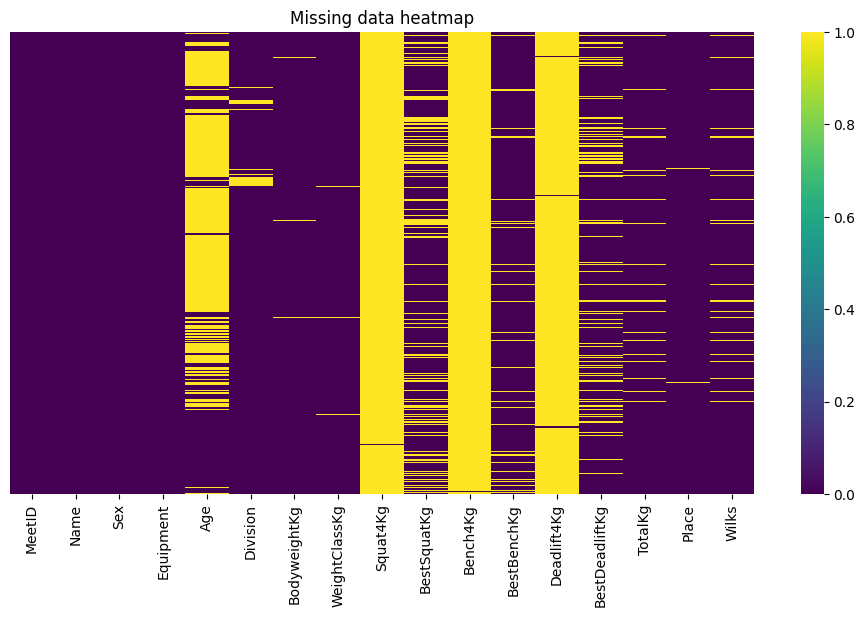

In [4]:
#verify missing data
print("Competition missing data:")
print(meets_df.isnull().sum())
print("\nLifters missing data:")
print(lifters_df.isnull().sum())

#visualize missing data %.
plt.figure(figsize=(12, 6))
sns.heatmap(lifters_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing data heatmap')
plt.show()

## Dataset relationship analysis

In [5]:
#verify dataset relationship using MeetID.
print("\nUnique number of MeetID in competitions:", meets_df['MeetID'].nunique())
print("Unique number of MeetID in lifters:", lifters_df['MeetID'].nunique())

#verify MeetIDs intersection.
meet_ids_comp = set(meets_df['MeetID'])
meet_ids_lift = set(lifters_df['MeetID'])
intersection = meet_ids_comp.intersection(meet_ids_lift)

print(f"\nNumber of competitions showing in both datasets: {len(intersection)}")


Unique number of MeetID in competitions: 8482
Unique number of MeetID in lifters: 8482

Number of competitions showing in both datasets: 8482


## Initial data cleaning

In [6]:
#convert dates into datetime format.
meets_df['Date'] = pd.to_datetime(meets_df['Date'])

#delete duplicates.
meets_df = meets_df.drop_duplicates()
lifters_df = lifters_df.drop_duplicates()

#verify numeric range values.
print("\nRange of values in numeric columns:")
numeric_cols = lifters_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"Min: {lifters_df[col].min()}")
    print(f"Max: {lifters_df[col].max()}")
    print("---")


Range of values in numeric columns:
MeetID:
Min: 0
Max: 8481
---
Age:
Min: 5.0
Max: 95.0
---
BodyweightKg:
Min: 15.88
Max: 242.4
---
Squat4Kg:
Min: -440.5
Max: 450.0
---
BestSquatKg:
Min: -477.5
Max: 573.79
---
Bench4Kg:
Min: -360.0
Max: 378.75
---
BestBenchKg:
Min: -522.5
Max: 488.5
---
Deadlift4Kg:
Min: -461.0
Max: 418.0
---
BestDeadliftKg:
Min: -410.0
Max: 460.4
---
TotalKg:
Min: 11.0
Max: 1365.31
---
Wilks:
Min: 13.73
Max: 779.38
---


## Powerlifting meetings analysis

In [7]:
import plotly.express as px
import folium
from folium.plugins import HeatMap

Competitions general statistics:
Total de competiciones: 8482
Rango de fechas: 1974-03-02 00:00:00 a 2018-01-28 00:00:00
Número de países: 45
Número de federaciones: 60


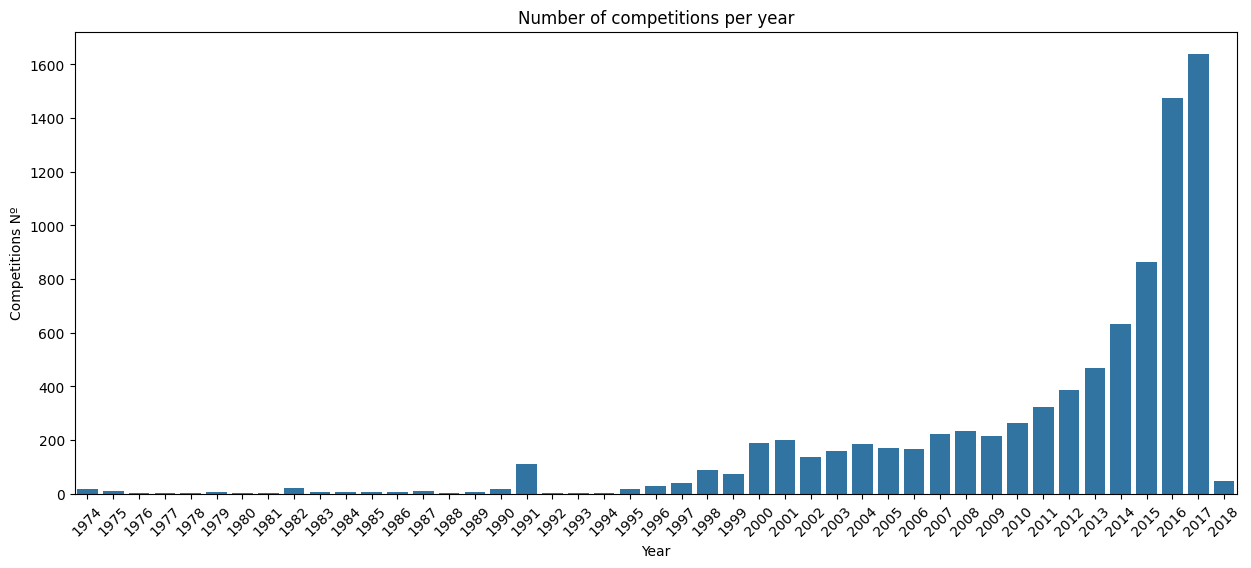


Top 5 cities with more competitions:
MeetTown
Brumunddal    163
Bergen        124
Halden        101
Melbourne      96
Oslo           93
Name: count, dtype: int64


C:\Users\glamb\AppData\Local\Temp\ipykernel_15372\4041610542.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

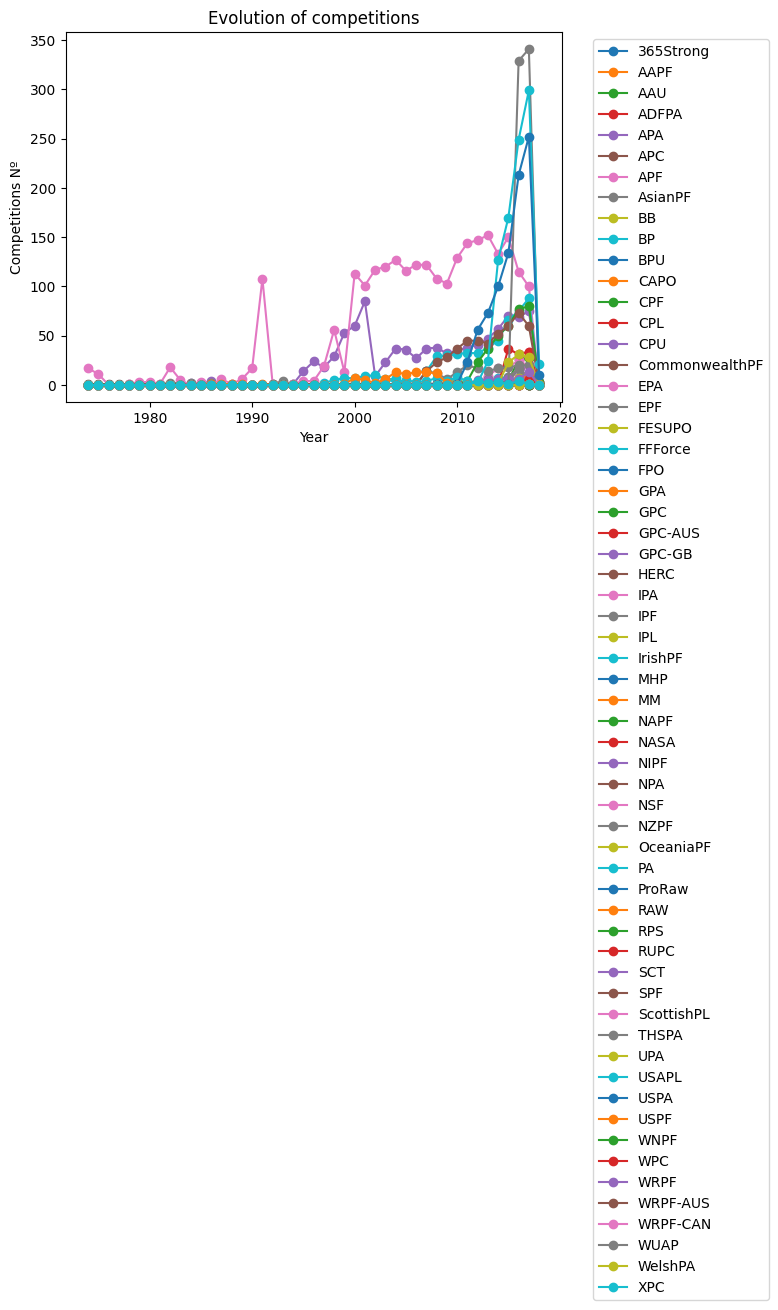

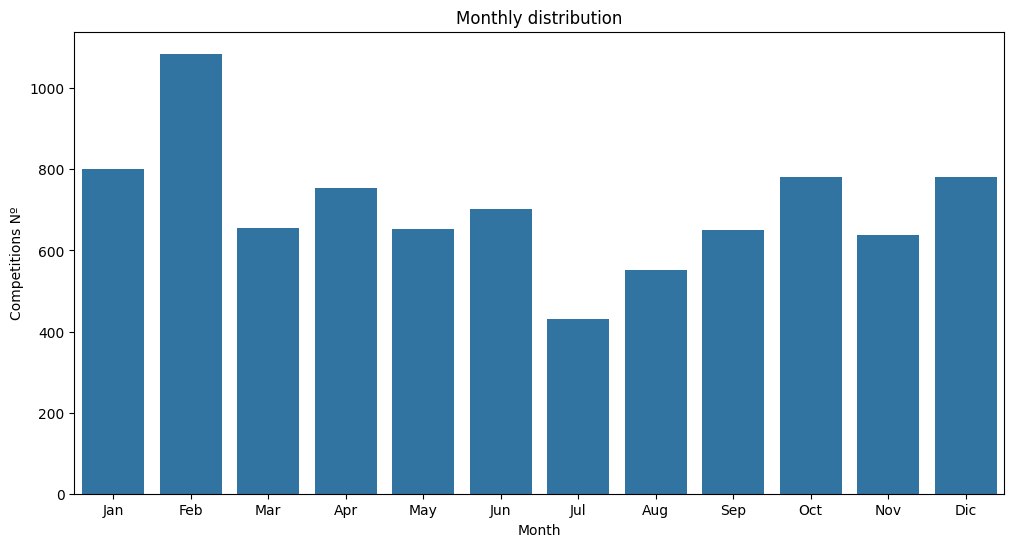

In [8]:
#competition statistics general analysis.
print("Competitions general statistics:")
print(f"Total de competiciones: {meets_df['MeetID'].nunique()}")
print(f"Rango de fechas: {meets_df['Date'].min()} a {meets_df['Date'].max()}")
print(f"Número de países: {meets_df['MeetCountry'].nunique()}")
print(f"Número de federaciones: {meets_df['Federation'].nunique()}")

#event time distribution.
plt.figure(figsize=(15, 6))
meets_df['Year'] = meets_df['Date'].dt.year
yearly_meets = meets_df['Year'].value_counts().sort_index()
sns.barplot(x=yearly_meets.index, y=yearly_meets.values)
plt.title('Number of competitions per year')
plt.xlabel('Year')
plt.ylabel('Competitions Nº')
plt.xticks(rotation=45)
plt.show()

#top 5 locations.
print("\nTop 5 cities with more competitions:")
print(meets_df['MeetTown'].value_counts().head(5))

#federations analysis.
plt.figure(figsize=(15, 8))
federation_yearly = meets_df.pivot_table(
    index='Year',
    columns='Federation',
    aggfunc='size',
    fill_value=0
)
federation_yearly.plot(kind='line', marker='o')
plt.title('Evolution of competitions')
plt.xlabel('Year')
plt.ylabel('Competitions Nº')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#seasonal analysis.
meets_df['Month'] = meets_df['Date'].dt.month
plt.figure(figsize=(12, 6))
monthly_meets = meets_df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_meets.index, y=monthly_meets.values)
plt.title('Monthly distribution')
plt.xlabel('Month')
plt.ylabel('Competitions Nº')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

## Competitors and Scoring analysis.

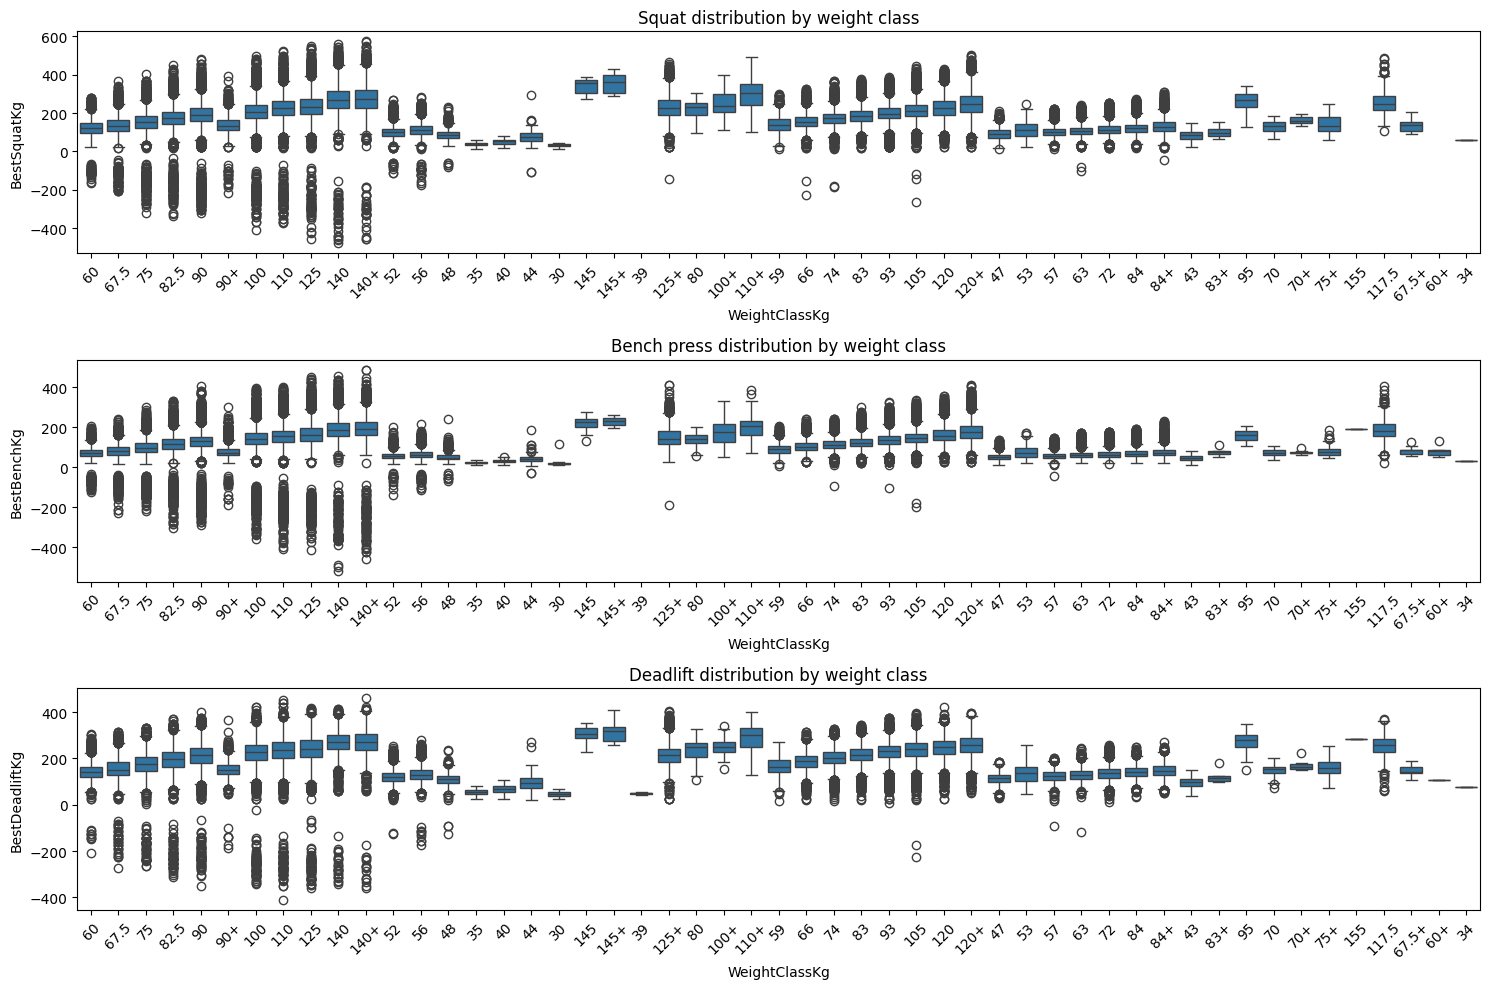

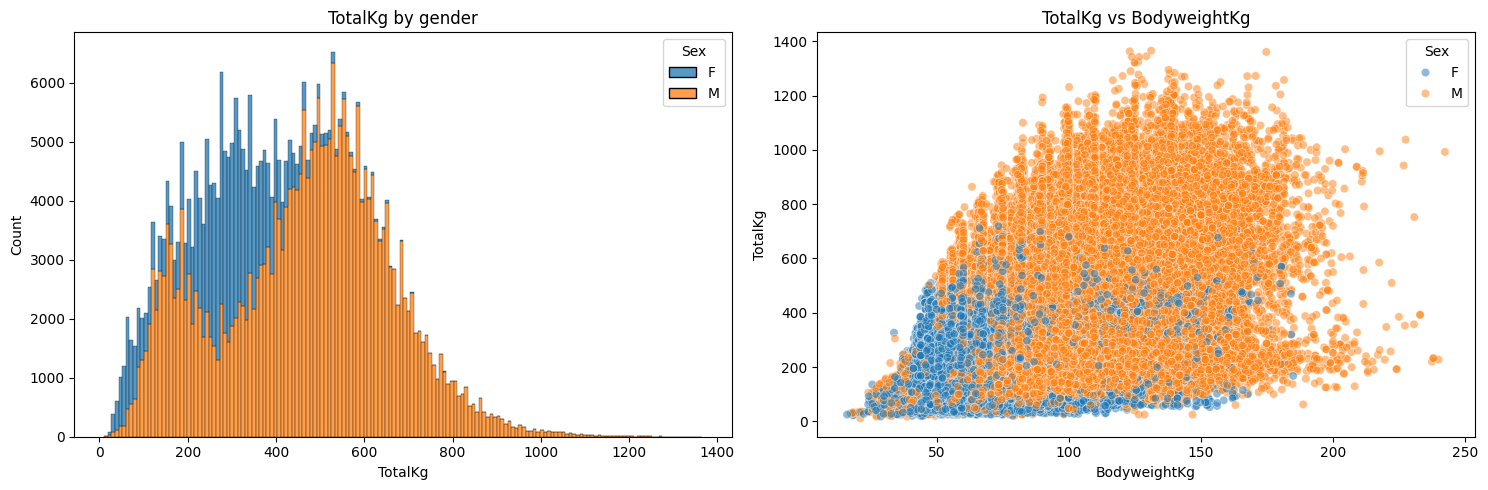


Top 10 Squats:
                   Name Sex WeightClassKg  BestSquatKg   Wilks
162480  Donnie Thompson   M          140+       573.79  735.88
162292  Donnie Thompson   M          140+       571.53  380.38
57011         Dave Hoff   M           140       560.19  771.07
236077       Jeff Frank   M          140+       552.50  675.90
53198         Dave Hoff   M           125       548.85  779.38
164551       AJ Roberts   M           140       546.58  725.48
163054        Dave Hoff   M           140       544.31  763.22
385726   Henry Thomason   M          140+       544.31  464.46
386213       Jeff Frank   M          140+       544.31  666.18
162484   Henry Thomason   M          140+       539.77     NaN

Top 10 Bench Press:
                  Name Sex WeightClassKg  BestBenchKg    Wilks
166346     Tiny Meeker   M          140+       488.50  270.480
166357     Tiny Meeker   M          140+       488.50  421.360
53735        Dave Hoff   M           140       455.86  753.330
166816       Dave 

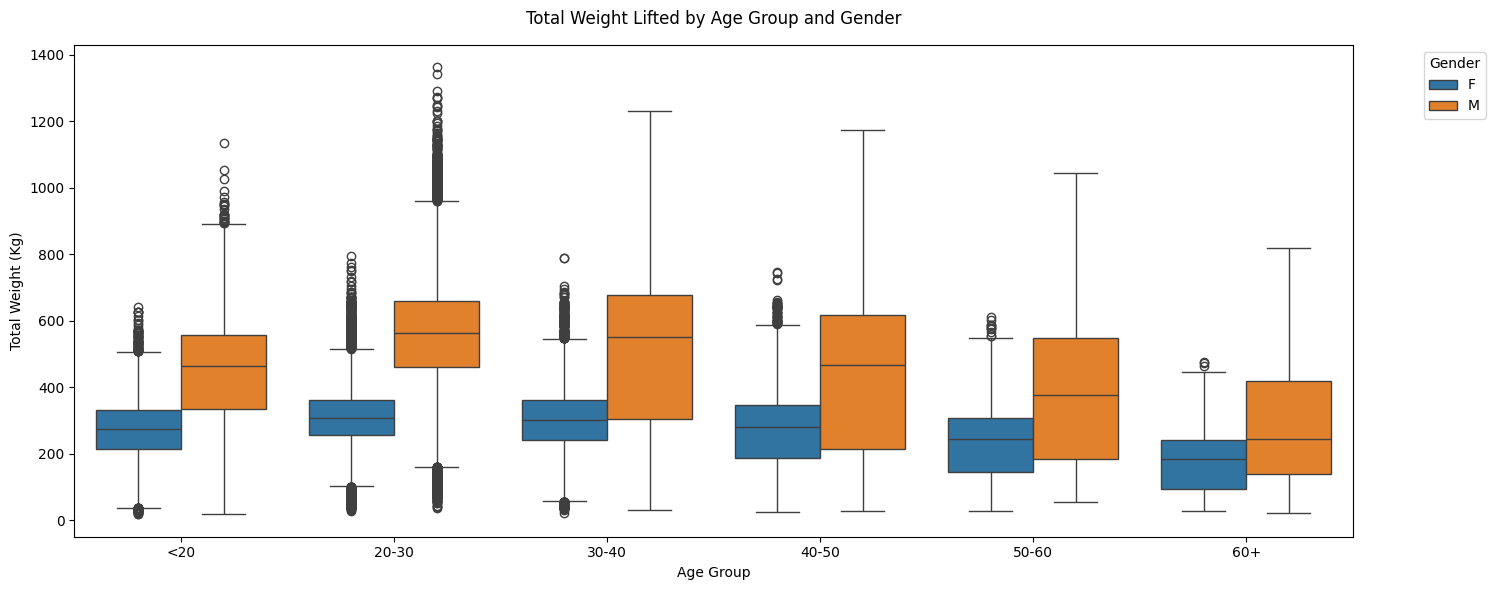


Average Total Weight by Age Group:
                 count        mean         std   min      25%     50%    75%  \
Age_Group Sex                                                                  
<20       F     6695.0  268.179733  101.245180  17.5  212.500  274.40  330.0   
          M    16680.0  439.320294  169.415538  17.0  335.495  462.66  557.5   
20-30     F    16273.0  304.801744  101.180914  27.5  256.280  307.50  360.0   
          M    40444.0  544.089175  186.670894  35.0  460.000  562.50  660.0   
30-40     F     9280.0  296.746756  112.421779  20.5  240.000  302.50  362.5   
          M    18420.0  517.834433  226.828761  30.0  305.000  550.00  677.5   
40-50     F     5959.0  269.453882  120.393302  25.0  187.500  280.00  347.5   
          M    11170.0  440.724447  222.346469  27.5  215.000  467.50  617.5   
50-60     F     2548.0  234.556864  110.514218  27.5  145.000  245.00  307.5   
          M     6485.0  378.721650  204.980247  55.0  185.000  375.00  547.5   
60+ 

C:\Users\glamb\AppData\Local\Temp\ipykernel_15372\2606689091.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(lifters_df.groupby(['Age_Group', 'Sex'])['TotalKg'].describe())


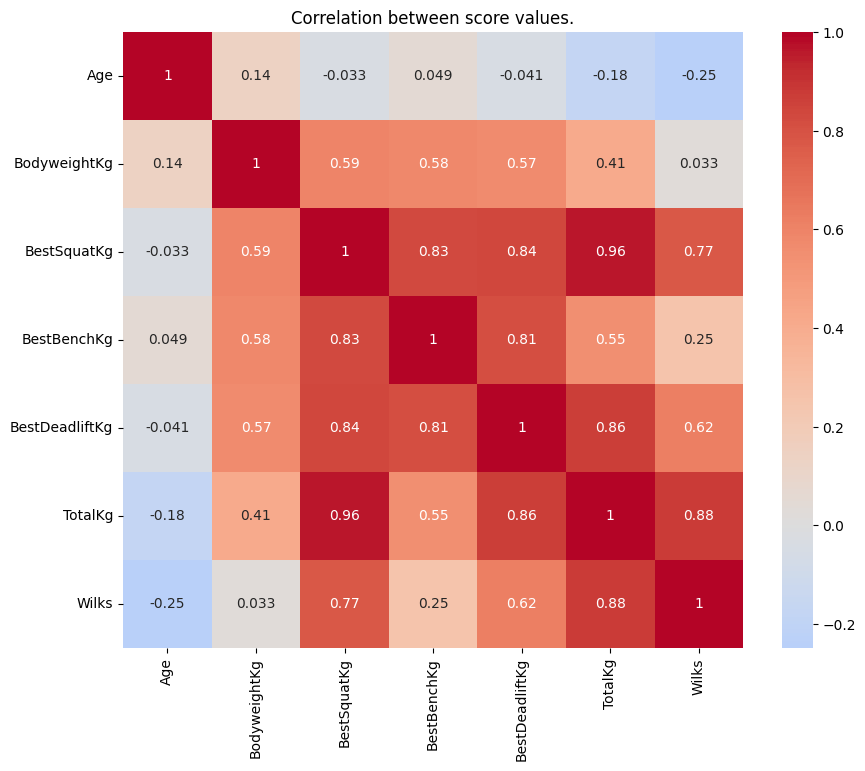

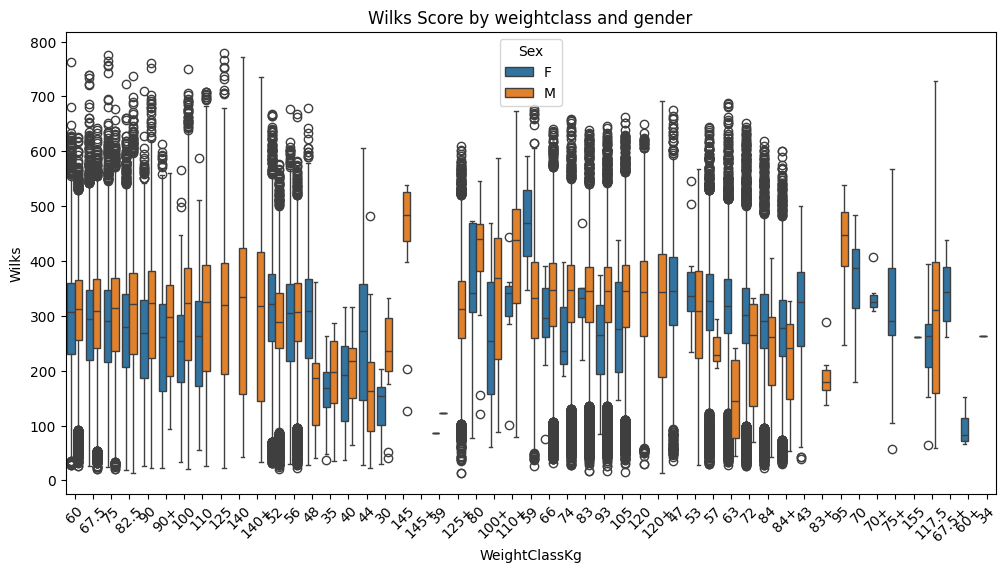


Performance statistics by gender:
    BestSquatKg                                                               \
          count        mean        std    min      25%    50%    75%     max   
Sex                                                                            
F       71176.0  113.259653  36.967682 -252.5   90.375  110.0  132.5  351.53   
M      226729.0  196.421074  64.875226 -477.5  157.500  192.5  230.0  573.79   

    BestBenchKg              ... TotalKg              Wilks              \
          count        mean  ...     75%      max     count        mean   
Sex                          ...                                          
F       82178.0   64.871636  ...   342.5   816.47   84079.0  286.950093   
M      273747.0  134.386653  ...   600.0  1365.31  277675.0  305.429529   

                                                          
            std      min     25%     50%     75%     max  
Sex                                                       
F    108.54

In [9]:
#lift analysis by category.
plt.figure(figsize=(15,10))

#add subplot for each lift type.
plt.subplot(3,1,1)
sns.boxplot(x= 'WeightClassKg', y= 'BestSquatKg', data=lifters_df)
plt.title('Squat distribution by weight class')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(x='WeightClassKg', y='BestBenchKg', data=lifters_df)
plt.title('Bench press distribution by weight class')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(x='WeightClassKg', y='BestDeadliftKg', data=lifters_df)
plt.title('Deadlift distribution by weight class')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#analysis by gender category.
plt.figure(figsize=(15, 5))

#totalkg histogram by gender.
plt.subplot(1, 2, 1)
sns.histplot(data = lifters_df, x='TotalKg', hue = 'Sex', multiple='stack')
plt.title('TotalKg by gender')

#totalKg vs weight class.
plt.subplot(1, 2, 2)
sns.scatterplot(data=lifters_df, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.5)
plt.title('TotalKg vs BodyweightKg')

plt.tight_layout()
plt.show()

#top performers analysis.
def get_top_performers(df, lift_type, n=10):
    return df.nlargest(n, lift_type)[['Name', 'Sex', 'WeightClassKg', lift_type, 'Wilks']]

#top performers in each discipline.
print("\nTop 10 Squats:")
print(get_top_performers(lifters_df, 'BestSquatKg'))

print("\nTop 10 Bench Press:")
print(get_top_performers(lifters_df, 'BestBenchKg'))

print("\nTop 10 Deadlifts:")
print(get_top_performers(lifters_df, 'BestDeadliftKg'))

#age analysis.

#create age bins for better visualization.
plt.figure(figsize=(15, 6))

#create age bins.
lifters_df['Age_Group'] = pd.cut(lifters_df['Age'], 
                                bins=[0, 20, 30, 40, 50, 60, 100],
                                labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])

#create boxplot.
sns.boxplot(data=lifters_df, x='Age_Group', y='TotalKg', hue='Sex')
plt.title('Total Weight Lifted by Age Group and Gender', fontsize=12, pad=15)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Total Weight (Kg)', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#print summary statistics for each age group.
print("\nAverage Total Weight by Age Group:")
print(lifters_df.groupby(['Age_Group', 'Sex'])['TotalKg'].describe())

#correlation between numeric variables.
numeric_cols = ['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']
correlation_matrix = lifters_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between score values.')
plt.show()

#relative performance analysis.
plt.figure(figsize=(12, 6))
sns.boxplot(data=lifters_df, x='WeightClassKg', y='Wilks', hue='Sex')
plt.xticks(rotation=45)
plt.title('Wilks Score by weightclass and gender')
plt.show()

#descriptive statistics by gender.
print("\nPerformance statistics by gender:")
print(lifters_df.groupby('Sex')[['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].describe())

# Trends and Comparisons analysis.
## This section analyzes how powerlifting has evolved over time, including records, trends and federation comparisons.

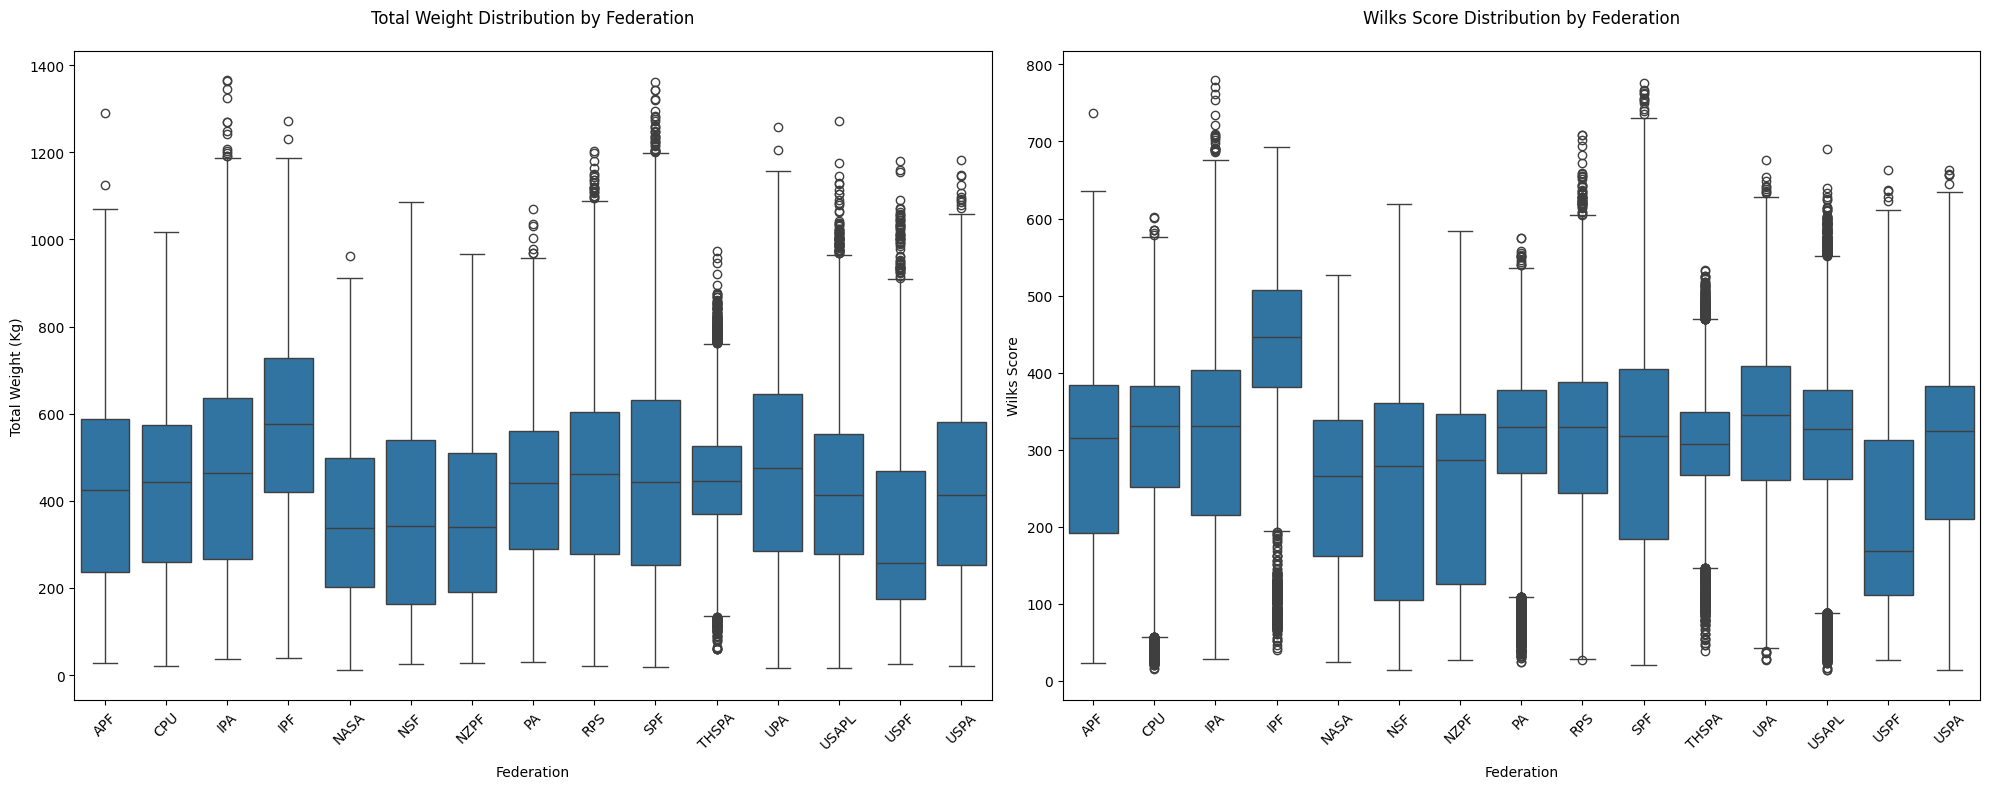


Federation Statistics:


TotalKg                    Wilks        
             count    mean      max    mean     max
Federation                                         
APF           3875  425.21  1290.00  294.00  737.19
CPU          28304  420.51  1017.50  300.77  602.38
IPA           3982  468.95  1365.31  314.90  779.38
IPF           8682  578.24  1271.50  437.32  692.21
NASA          8604  353.61   962.50  251.32  526.75
NSF          28965  361.32  1085.50  247.89  618.69
NZPF          4675  356.93   965.50  255.70  583.24
PA           12101  422.64  1070.00  307.67  575.14
RPS          22660  452.45  1202.50  310.96  707.94
SPF          17605  455.49  1360.78  304.89  776.17
THSPA        52625  449.59   972.96  308.64  532.61
UPA           4127  472.70  1257.50  327.18  675.90
USAPL        73244  416.78  1272.50  311.17  690.71
USPA         53712  419.36  1182.50  297.15  662.51
USPF          4905  335.62  1180.00  220.75  663.36

In [18]:
#first, merge datasets to get federation data.
lifters_with_dates = pd.merge(
    lifters_df,
    meets_df[['MeetID', 'Date', 'Federation']],
    on='MeetID',
    how='left'
)

#get top 15 federations by number of participants.
top_feds = lifters_with_dates['Federation'].value_counts().head(15).index
df_filtered = lifters_with_dates[lifters_with_dates['Federation'].isin(top_feds)]

#create federation comparison plot.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

#plot 1: Total Weight Distribution.
sns.boxplot(data=df_filtered, x='Federation', y='TotalKg', ax=ax1)
ax1.set_title('Total Weight Distribution by Federation', fontsize=12, pad=20)
ax1.set_xlabel('Federation', labelpad=10)
ax1.set_ylabel('Total Weight (Kg)')
ax1.tick_params(axis='x', rotation=45, labelsize=10)

#plot 2: Wilks Score Distribution.
sns.boxplot(data=df_filtered, x='Federation', y='Wilks', ax=ax2)
ax2.set_title('Wilks Score Distribution by Federation', fontsize=12, pad=20)
ax2.set_xlabel('Federation', labelpad=10)
ax2.set_ylabel('Wilks Score')
ax2.tick_params(axis='x', rotation=45, labelsize=10)

#adjust layout.
plt.tight_layout()

#display the plot.
plt.show()

#print federation statistics.
fed_stats = df_filtered.groupby('Federation').agg({
    'TotalKg': ['count', 'mean', 'max'],
    'Wilks': ['mean', 'max']
}).round(2)

print("\nFederation Statistics:")
display(fed_stats)

# Predictive Modeling
## Using machine learning to understand and predict powerlifting performance.

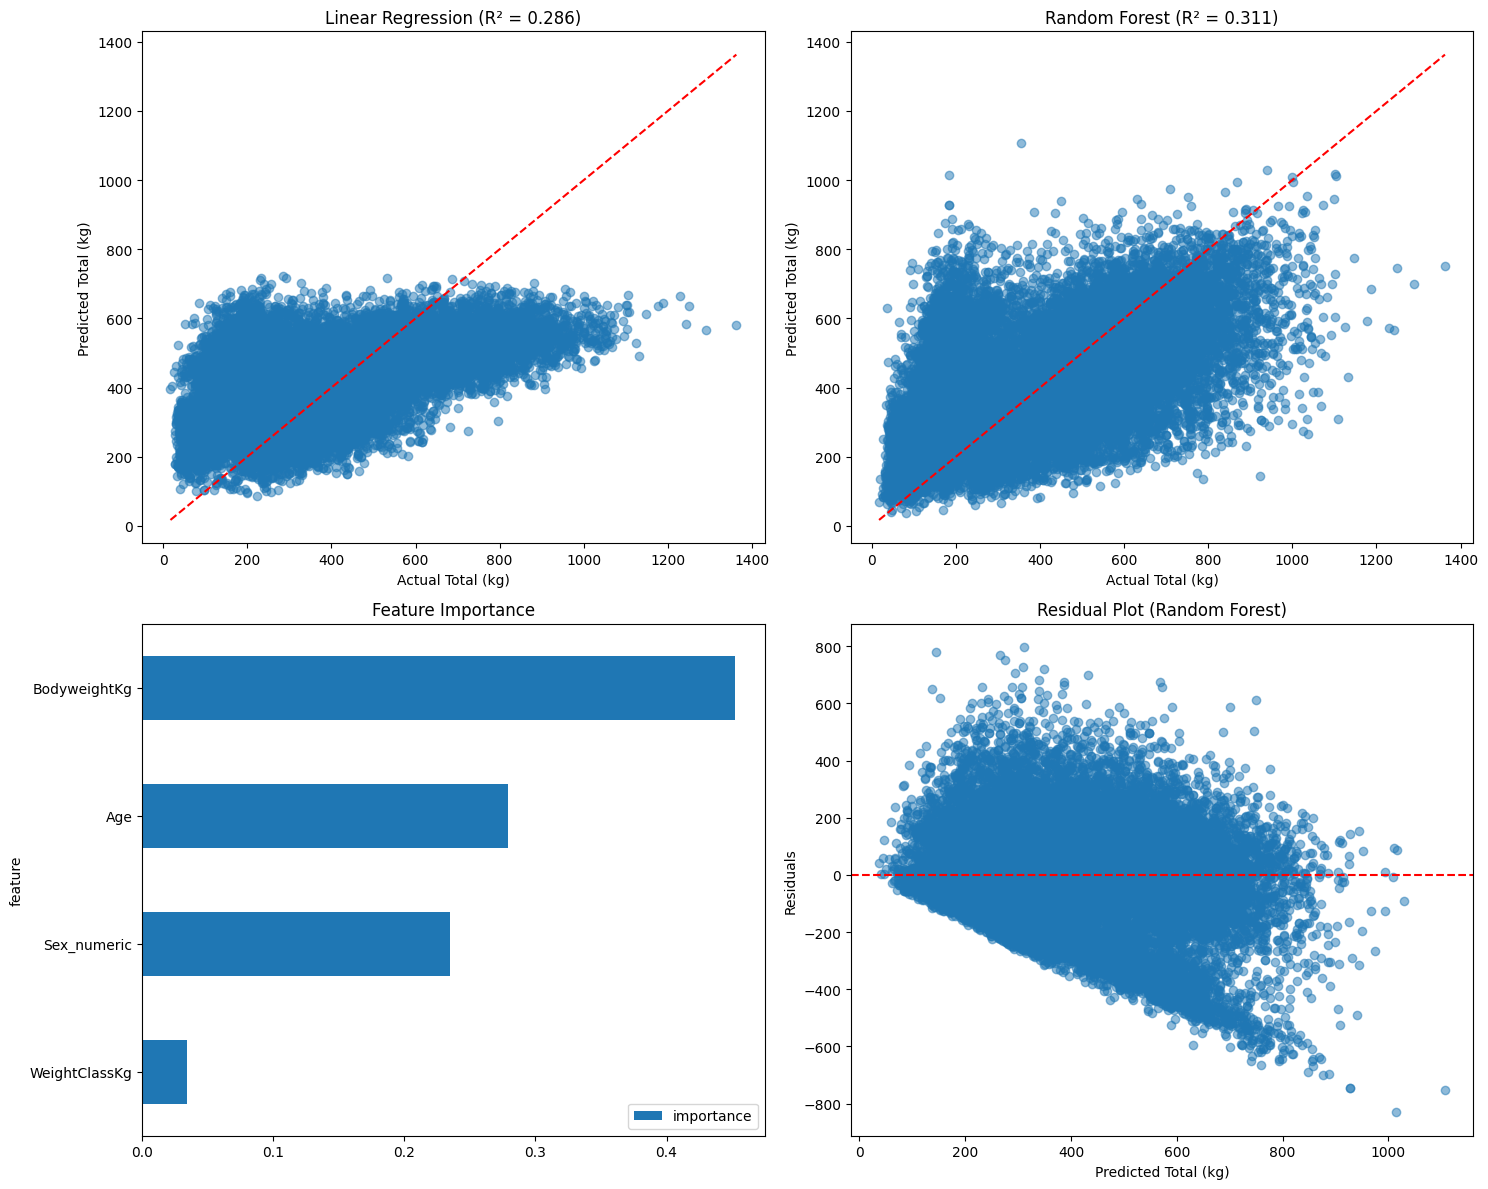

In [23]:
def prepare_data_for_modeling(df):
    #create a copy to avoid modifying original data.
    df_model = df.copy()
    
    #clean weight class data - handle string values like '90+'.
    def clean_weight_class(x):
        if isinstance(x, str):
            return float(x.replace('+', ''))
        return float(x)
    
    #convert weight classes to numeric values.
    df_model['WeightClassKg'] = df_model['WeightClassKg'].apply(clean_weight_class)
    
    #handle missing values.
    df_model = df_model.dropna(subset=['TotalKg', 'BodyweightKg', 'WeightClassKg', 'Age'])
    
    #convert Sex to numeric.
    df_model['Sex_numeric'] = df_model['Sex'].map({'M': 1, 'F': 0})
    
    #select features and target.
    X = df_model[['Sex_numeric', 'BodyweightKg', 'WeightClassKg', 'Age']]
    y = df_model['TotalKg']
    
    return X, y

#now run the modeling code.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#prepare the data.
X, y = prepare_data_for_modeling(lifters_df)

#train models and visualize results.
def train_and_visualize_models(X, y):
    #split data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #scale features.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #train Linear Regression.
    lin_model = LinearRegression()
    lin_model.fit(X_train_scaled, y_train)
    lin_pred = lin_model.predict(X_test_scaled)
    
    #train Random Forest.
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    #calculate metrics.
    lin_r2 = r2_score(y_test, lin_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    
    #visualizations.
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    #linear Regression Plot.
    ax1.scatter(y_test, lin_pred, alpha=0.5)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax1.set_title(f'Linear Regression (R² = {lin_r2:.3f})')
    ax1.set_xlabel('Actual Total (kg)')
    ax1.set_ylabel('Predicted Total (kg)')
    
    # Random Forest Plot.
    ax2.scatter(y_test, rf_pred, alpha=0.5)
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax2.set_title(f'Random Forest (R² = {rf_r2:.3f})')
    ax2.set_xlabel('Actual Total (kg)')
    ax2.set_ylabel('Predicted Total (kg)')
    
    #feature Importance.
    importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    importance.plot(kind='barh', x='feature', y='importance', ax=ax3)
    ax3.set_title('Feature Importance')
    
    #residual Plot.
    residuals = y_test - rf_pred
    ax4.scatter(rf_pred, residuals, alpha=0.5)
    ax4.axhline(y=0, color='r', linestyle='--')
    ax4.set_title('Residual Plot (Random Forest)')
    ax4.set_xlabel('Predicted Total (kg)')
    ax4.set_ylabel('Residuals')
    
    plt.tight_layout()
    plt.show()
    
    return lin_model, rf_model, scaler

#execute the analysis.
models = train_and_visualize_models(X, y)